In [143]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration: Kaggle Credit data

**GOAL**: Use training data to predict on test set which customers will have a credit default, based on 12 features

let's examine the data:

In [144]:
df = pd.read_csv('../data/processed/cs-training.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.77,45,2,0.80,9120.0,13,0,6,0,2.0
1,2,0,0.96,40,0,0.12,2600.0,4,0,0,0,1.0
2,3,0,0.66,38,1,0.09,3042.0,2,1,0,0,0.0
3,4,0,0.23,30,0,0.04,3300.0,5,0,0,0,0.0
4,5,0,0.91,49,1,0.02,63588.0,7,0,1,0,0.0


In [145]:
print(df.shape)     # output format (numrows,numcols)

(150000, 12)


In [146]:
print(df.columns)  # column names

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


For example above the `RevolvingUtilizationof UnsecuredLines` from the data dictionary is the percentage of available credit that is used by the customer (utilization measure).

It's important to see the data dictionary here since, the type of this feautre is given as int64, but you wouldn't know that it is a percentage or what it represents without the data dictionary. 

In [147]:
pd.set_option('display.max_colwidth', 200)     # make it so we can read the full description
pd.read_excel('../references/Data Dictionary.xls')


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquency or worse,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or more past due.,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans including home equity lines of credit,integer


In [148]:
print(df.info())   # general info, column data types
                   # It's quite important to note that this will also give you the number
                   # of missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB
None


In [149]:
df.describe()   # It is a good idea to make sure you understand each feature in this small dataset

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,1.20e+05,150000.00,150000.00,150000.00,150000.00,146076.00
mean,75000.50,0.07,6.05,52.30,0.42,353.01,6.67e+03,8.45,0.27,1.02,0.24,0.76
std,43301.41,0.25,249.76,14.77,4.19,2037.82,1.44e+04,5.15,4.17,1.13,4.16,1.12
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,37500.75,0.00,0.03,41.00,0.00,0.18,3.40e+03,5.00,0.00,0.00,0.00,0.00
50%,75000.50,0.00,0.15,52.00,0.00,0.37,5.40e+03,8.00,0.00,1.00,0.00,0.00
75%,112500.25,0.00,0.56,63.00,0.00,0.87,8.25e+03,11.00,0.00,2.00,0.00,1.00
max,150000.00,1.00,50708.00,109.00,98.00,329664.00,3.01e+06,58.00,98.00,54.00,98.00,20.00


## Exploring by visualization


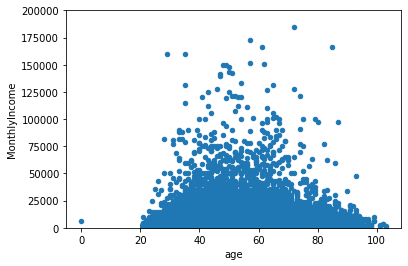

In [150]:
df.plot(kind='scatter',x='age',y='MonthlyIncome',ylim=(0,200000))

Here it is quite interesting to observe an expected pattern in the data, which is a sort of **triangle**, income goes up until you hit about 40-50 years old, then it starts declining, not a suprise, but it interesting to see it in the data


There is another interesting thing that I see in this data, which is that there is some data at the 0 years of age, and 0 dollars, let's try to see what's going on there.

In [151]:
df.loc[df['age'] == 0]   # case of a spurious data point!!

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.44,6000.0,6,0,2,0,2.0


This is an interesting case. What happened is that the age of the client is unknown, but instead of writing NA, NULL, or NaN. The age was just set to zero. This is a common problem in datasets, where what should be a null, or missing value is initialized to zero, this can have quite disturbing effects because it will create outliers which could affect your model in negative ways.


Now let's try look at the thing we are trying to predict plotted versus one of the features (predictors)

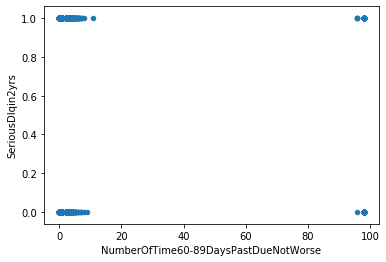

In [152]:
df.plot(kind='scatter',x='NumberOfTime60-89DaysPastDueNotWorse',y='SeriousDlqin2yrs')

There are clearly some very severe outliers (possibly this is result of erroneous data. Also, another problem is that you are just not getting the visualization that you want here. **We are not asking the right question from the dataset**

One question that I have is how to do a visualization of delinquincy versus this past history of deliquincies. Really you need some kind of counts rather than scatter plot. 

What is the percentage of defaults in the test set vs the `NumberOfTime60-89DaysPastDueNotWorse`?

This requires us to do some aggregation and some calculations on the data

In [153]:
df["SeriousDlqin2yrs"].value_counts()[1]/150000   # ungrouped percentage

0.06684

This means that about 6.6% of the test data experienced a serious delinquency in the next 2 years.

Next, we will obtain the percentages as a function of past delinquencies (60-89 days). To do this we will operate with the pandas `Series` objects

In [154]:
df2 = df.groupby(['NumberOfTime60-89DaysPastDueNotWorse'])["SeriousDlqin2yrs"].value_counts() # returns Series data type

In [155]:
df2

NumberOfTime60-89DaysPastDueNotWorse  SeriousDlqin2yrs
0                                     0                   135140
                                      1                     7256
1                                     0                     3954
                                      1                     1777
2                                     1                      561
                                      0                      557
3                                     1                      180
                                      0                      138
4                                     1                       65
                                      0                       40
5                                     1                       21
                                      0                       13
6                                     1                       12
                                      0                        4
7                                  

In [156]:
print(df2[0][1])
df2.index     # interesting structure called a MultiIndex

7256


MultiIndex([( 0, 0),
            ( 0, 1),
            ( 1, 0),
            ( 1, 1),
            ( 2, 1),
            ( 2, 0),
            ( 3, 1),
            ( 3, 0),
            ( 4, 1),
            ( 4, 0),
            ( 5, 1),
            ( 5, 0),
            ( 6, 1),
            ( 6, 0),
            ( 7, 1),
            ( 7, 0),
            ( 8, 0),
            ( 8, 1),
            ( 9, 0),
            (11, 1),
            (96, 1),
            (96, 0),
            (98, 1),
            (98, 0)],
           names=['NumberOfTime60-89DaysPastDueNotWorse', 'SeriousDlqin2yrs'])

Text(0, 0.5, 'SeriousDlqin2yrs-Proportion-TRUE')

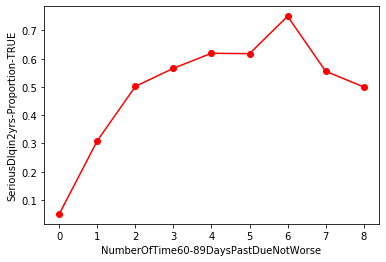

In [159]:
first_index = np.sort(df['NumberOfTime60-89DaysPastDueNotWorse'].unique())
percentags = np.zeros(9)
i = 0
for index in first_index:
    if i < 9:
        percentags[i] = df2[index][1]/(df2[index][0] + df2[index][1])
    i+=1
    
plt.plot(first_index[0:9],percentags,'-ro') 
plt.xlabel("NumberOfTime60-89DaysPastDueNotWorse")
plt.ylabel("SeriousDlqin2yrs-Proportion-TRUE")

As an interesting, takeaway from this plot we might suspect that there is some sort of nonlinear relationship between number of previous delinquencies (60-89 days) and the rate of future delinquencies in the next two years. This may inform us in our feature selection process. For example you might fit this function to say log(x), and if it fits well then log(x) would be a good feature to regress on in a linear regression.

**CAUTION** in the above plot, the sample size is not constant and is ver small for x > 5, n around 10 or less so these are not so reliable.